In [1]:
#install.packages('devtools')
#devtools::install_github('IRkernel/IRkernel')
#IRkernel::installspec()
#install.packages('plotly')
#install.packages('reshape')

#if (!requireNamespace("BiocManager", quietly = TRUE))
#   install.packages("BiocManager")

#BiocManager::install("phyloseq")

#install.packages('ggplot2')
#install.packages('plyr')
#install.packages('wesanderson')
#install.packages('vegan')
#install.packages('KernSmooth')


The downloaded binary packages are in
	/var/folders/0f/ff5j1xns5jbgs40zs1d96b2w0000gn/T//RtmpUvS62j/downloaded_packages


'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/jupyter/jupyter_kernel_test.git /var/folders/0f/ff5j1xns5jbgs40zs1d96b2w0000gn/T//RtmpUvS62j/remotes623a74ef56/IRkernel-IRkernel-67592db/tests/testthat/jkt
'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/flying-sheep/ndjson-testrunner.git /var/folders/0f/ff5j1xns5jbgs40zs1d96b2w0000gn/T//RtmpUvS62j/remotes623a74ef56/IRkernel-IRkernel-67592db/tests/testthat/njr



✔  checking for file ‘/private/var/folders/0f/ff5j1xns5jbgs40zs1d96b2w0000gn/T/RtmpUvS62j/remotes623a74ef56/IRkernel-IRkernel-67592db/DESCRIPTION’
─  preparing ‘IRkernel’: (451ms)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘IRkernel/example-notebooks’
─  building ‘IRkernel_1.0.2.9000.tar.gz’
   


also installing the dependencies ‘tidyselect’, ‘lifecycle’, ‘plogr’, ‘tidyr’, ‘hexbin’, ‘dplyr’, ‘data.table’




  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.12.2 1.12.4              TRUE


The downloaded binary packages are in
	/var/folders/0f/ff5j1xns5jbgs40zs1d96b2w0000gn/T//RtmpUvS62j/downloaded_packages


installing the source package ‘data.table’

Warning message in install.packages("plotly"):
“installation of package ‘data.table’ had non-zero exit status”

In [1]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)
library(vegan)


Attaching package: ‘plyr’


The following objects are masked from ‘package:reshape’:

    rename, round_any



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:reshape’:

    rename


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:reshape’:

    rename


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: permute

Loading required package: lattice

This i

In [2]:
# Open phyloseq objects

ps.whitman = readRDS(file = "whitman.ps")
ps.wu = readRDS(file = "wu.ps")
ps.imparato = readRDS(file = "imparato.ps")
ps.yao = readRDS(file = "yao.ps")
ps.song = readRDS(file = "song.ps")
ps.dai2016 = readRDS(file = "dai2016.ps")
ps.dai2017 = readRDS(file = "dai2017.ps")
ps.nielsen2014 = readRDS(file = "ps.nielsen2014")
ps.ye = readRDS(file = "ps.ye")
ps.xu= readRDS(file = "ps.xu")

## Glom each phyloseq object at the genus, family, and order levels and remove ambiguous rows (taxonomy data consisting of names such as "uncultured", "ambiguous", "unidentified", "unknown", etc.) 

### Whitman


In [5]:
# Glom taxonomy data at genus, family, and order levels

Whit_glom_genus = tax_glom(ps.whitman, "Genus")
Whit_glom_family = tax_glom(ps.whitman, "Family")
Whit_glom_order = tax_glom(ps.whitman, "Order")

In [6]:
# Check the dimensions of the new tables

dim(tax_table(ps.whitman))
dim(tax_table(Whit_glom_genus))
dim(tax_table(Whit_glom_family))
dim(tax_table(Whit_glom_order))

[1] 8628    7

[1] 707   7

[1] 409   7

[1] 248   7

In [7]:
# remove taxa that are non-descriptive from each glommed taxonomy table. Names to remove include: "uncultured", "metagenome", "ambiguous"

unwanted.rows = grep("uncultured*",tax_table(Whit_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(Whit_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(Whit_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(Whit_glom_genus))) %in% unwanted.rows)
whit_pruned.genus = prune_taxa(taxa_names(Whit_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(Whit_glom_genus))) %in% unwanted.rows)], Whit_glom_genus) 
whit_pruned.genus

[1] 350

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 357 taxa and 119 samples ]
sample_data() Sample Data:       [ 119 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 357 taxa by 7 taxonomic ranks ]

In [8]:
unwanted.rows = grep("uncultured*",tax_table(Whit_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(Whit_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(Whit_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(Whit_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(Whit_glom_family))) %in% unwanted.rows)
whit_pruned.family = prune_taxa(taxa_names(Whit_glom_family)[wanted.rows = !(rep(1:length(taxa_names(Whit_glom_family))) %in% unwanted.rows)], Whit_glom_family) 
whit_pruned.family

[1] 187

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 222 taxa and 119 samples ]
sample_data() Sample Data:       [ 119 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 222 taxa by 7 taxonomic ranks ]

In [9]:
unwanted.rows = grep("uncultured*",tax_table(Whit_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(Whit_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(Whit_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(Whit_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(Whit_glom_order))) %in% unwanted.rows)
whit_pruned.order = prune_taxa(taxa_names(Whit_glom_order)[wanted.rows = !(rep(1:length(taxa_names(Whit_glom_order))) %in% unwanted.rows)], Whit_glom_order) 
whit_pruned.order

[1] 95

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 153 taxa and 119 samples ]
sample_data() Sample Data:       [ 119 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 153 taxa by 7 taxonomic ranks ]

In [10]:
# Make a dataframe with the sample sums
data.frame(sample_sums(ps.whitman),sample_sums(Whit_glom_genus),sample_sums(Whit_glom_family), sample_sums(Whit_glom_order), sample_sums(whit_pruned.genus),sample_sums(whit_pruned.family), sample_sums(whit_pruned.order))

,sample_sums.ps.whitman.,sample_sums.Whit_glom_genus.,sample_sums.Whit_glom_family.,sample_sums.Whit_glom_order.,sample_sums.whit_pruned.genus.,sample_sums.whit_pruned.family.,sample_sums.whit_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S001,28924,21802,25637,25932,13955,21146,24496
S002,16900,12103,14890,15204,8259,12333,14627
S003,11546,8442,10297,10546,5514,8442,10175
S004,12423,9048,11076,11327,6160,9181,10934
S006,11472,8838,10608,10814,6232,9030,10633
S007,12937,9564,11660,11947,6526,9677,11521
S008,15964,11486,13937,14249,7256,11075,13612
S009,32752,24246,28335,28902,14448,22359,26763
S011,14014,10001,12417,12574,6298,9828,12206


### Wu

In [11]:
wu_glom_genus = tax_glom(ps.wu, "Genus")
wu_glom_family = tax_glom(ps.wu, "Family")
wu_glom_order = tax_glom(ps.wu, "Order")

In [12]:
dim(tax_table(ps.wu))
dim(tax_table(wu_glom_genus))
dim(tax_table(wu_glom_family))

[1] 480   7

[1] 174   7

[1] 122   7

In [13]:
unwanted.rows = grep("uncultured*",tax_table(wu_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(wu_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(wu_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Triticum*",tax_table(wu_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(wu_glom_genus))) %in% unwanted.rows)
wu_pruned.genus = prune_taxa(taxa_names(wu_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(wu_glom_genus))) %in% unwanted.rows)], wu_glom_genus) 
wu_pruned.genus

[1] 72

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 102 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 102 taxa by 7 taxonomic ranks ]

In [14]:
unwanted.rows = grep("uncultured*",tax_table(wu_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(wu_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(wu_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(wu_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(wu_glom_family))) %in% unwanted.rows)
wu_pruned.family = prune_taxa(taxa_names(wu_glom_family)[wanted.rows = !(rep(1:length(taxa_names(wu_glom_family))) %in% unwanted.rows)], wu_glom_family) 
wu_pruned.family

[1] 46

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 76 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 76 taxa by 7 taxonomic ranks ]

In [15]:
unwanted.rows = grep("uncultured*",tax_table(wu_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(wu_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(wu_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(wu_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(wu_glom_order))) %in% unwanted.rows)
wu_pruned.order = prune_taxa(taxa_names(wu_glom_order)[wanted.rows = !(rep(1:length(taxa_names(wu_glom_order))) %in% unwanted.rows)], wu_glom_order) 
wu_pruned.order

[1] 18

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 62 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 62 taxa by 7 taxonomic ranks ]

In [16]:
data.frame(sample_sums(ps.wu),sample_sums(wu_glom_genus),sample_sums(wu_glom_family), sample_sums(wu_glom_order), sample_sums(wu_pruned.genus),sample_sums(wu_pruned.family), sample_sums(wu_pruned.order))

,sample_sums.ps.wu.,sample_sums.wu_glom_genus.,sample_sums.wu_glom_family.,sample_sums.wu_glom_order.,sample_sums.wu_pruned.genus.,sample_sums.wu_pruned.family.,sample_sums.wu_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR2919159-X,3151,2838,3013,3135,2145,2725,2886
SRR2919160-X,3368,3014,3264,3349,2282,3002,3202
SRR2919161-X,3145,2484,2999,3110,1818,2658,2797
SRR2919162-X,6803,6237,6579,6763,5170,6195,6473
SRR2919163-X,3410,3131,3300,3407,2108,2842,3072
SRR2919164-X,5052,4440,4887,4990,3736,4651,4834


### Imparato

In [17]:
imparato_glom_genus = tax_glom(ps.imparato, "Genus")
imparato_glom_family = tax_glom(ps.imparato, "Family")
imparato_glom_order = tax_glom(ps.imparato, "Order")

In [18]:
dim(tax_table(ps.imparato))
dim(tax_table(imparato_glom_genus))
dim(tax_table(imparato_glom_family))
dim(tax_table(imparato_glom_order))

[1] 21702     7

[1] 768   7

[1] 453   7

[1] 267   7

In [19]:
unwanted.rows = grep("uncultured*",tax_table(imparato_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(imparato_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(imparato_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Triticum*",tax_table(imparato_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(imparato_glom_genus))) %in% unwanted.rows)
imparato_pruned.genus = prune_taxa(taxa_names(imparato_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(imparato_glom_genus))) %in% unwanted.rows)], imparato_glom_genus) 
imparato_pruned.genus

[1] 387

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 381 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 381 taxa by 7 taxonomic ranks ]

In [20]:
unwanted.rows = grep("uncultured*",tax_table(imparato_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(imparato_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(imparato_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(imparato_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(imparato_glom_family))) %in% unwanted.rows)
imparato_pruned.family = prune_taxa(taxa_names(imparato_glom_family)[wanted.rows = !(rep(1:length(taxa_names(imparato_glom_family))) %in% unwanted.rows)], imparato_glom_family) 
imparato_pruned.family

[1] 218

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 235 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 235 taxa by 7 taxonomic ranks ]

In [21]:
unwanted.rows = grep("uncultured*",tax_table(imparato_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(imparato_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(imparato_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(imparato_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(imparato_glom_order))) %in% unwanted.rows)
imparato_pruned.order = prune_taxa(taxa_names(imparato_glom_order)[wanted.rows = !(rep(1:length(taxa_names(imparato_glom_order))) %in% unwanted.rows)], imparato_glom_order) 
imparato_pruned.order

[1] 96

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 171 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 171 taxa by 7 taxonomic ranks ]

In [22]:
data.frame(sample_sums(ps.imparato),sample_sums(imparato_glom_genus),sample_sums(imparato_glom_family),sample_sums(imparato_glom_genus),sample_sums(imparato_glom_order),sample_sums(imparato_pruned.genus),sample_sums(imparato_pruned.family), sample_sums(imparato_pruned.order))

,sample_sums.ps.imparato.,sample_sums.imparato_glom_genus.,sample_sums.imparato_glom_family.,sample_sums.imparato_glom_genus..1,sample_sums.imparato_glom_order.,sample_sums.imparato_pruned.genus.,sample_sums.imparato_pruned.family.,sample_sums.imparato_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR3586000-X,11969,7542,10915,7542,11255,4040,9674,10595
SRR3586001-X,14583,9737,13510,9737,13747,5616,11976,12914
SRR3586002-X,26908,18798,24899,18798,25421,10500,21411,23515
SRR3586003-X,14627,9779,13315,9779,13622,5061,11531,12674
SRR3586004-X,32112,22266,29820,22266,30481,12350,25728,28369
SRR3586005-X,34159,23245,31839,23245,32465,12624,27171,30118
SRR3586006-X,20258,12846,18806,12846,19252,7529,16614,18092
SRR3586007-X,40798,28999,38582,28999,39329,16427,33053,36521
SRR3586008-X,17944,12036,16503,12036,16863,7012,14503,15845


### Dai 2016

In [23]:
dai2016_glom_genus = tax_glom(ps.dai2016, "Genus")
dai2016_glom_family = tax_glom(ps.dai2016, "Family")
dai2016_glom_order = tax_glom(ps.dai2016, "Order")

In [24]:
dim(tax_table(ps.dai2016))
dim(tax_table(dai2016_glom_genus))
dim(tax_table(dai2016_glom_family))
dim(tax_table(dai2016_glom_order))

[1] 3699    7

[1] 590   7

[1] 378   7

[1] 238   7

In [25]:
unwanted.rows = grep("uncultured*",tax_table(dai2016_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(dai2016_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(dai2016_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Triticum*",tax_table(dai2016_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(dai2016_glom_genus))) %in% unwanted.rows)
dai2016_pruned.genus = prune_taxa(taxa_names(dai2016_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(dai2016_glom_genus))) %in% unwanted.rows)], dai2016_glom_genus) 
dai2016_pruned.genus

[1] 278

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 312 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 312 taxa by 7 taxonomic ranks ]

In [26]:
unwanted.rows = grep("uncultured*",tax_table(dai2016_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(dai2016_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(dai2016_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(dai2016_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(dai2016_glom_family))) %in% unwanted.rows)
dai2016_pruned.family = prune_taxa(taxa_names(dai2016_glom_family)[wanted.rows = !(rep(1:length(taxa_names(dai2016_glom_family))) %in% unwanted.rows)], dai2016_glom_family) 
dai2016_pruned.family

[1] 156

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 222 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 222 taxa by 7 taxonomic ranks ]

In [27]:
unwanted.rows = grep("uncultured*",tax_table(dai2016_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(dai2016_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(dai2016_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(dai2016_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(dai2016_glom_order))) %in% unwanted.rows)
dai2016_pruned.order = prune_taxa(taxa_names(dai2016_glom_order)[wanted.rows = !(rep(1:length(taxa_names(dai2016_glom_order))) %in% unwanted.rows)], dai2016_glom_order) 
dai2016_pruned.order

[1] 70

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 168 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 168 taxa by 7 taxonomic ranks ]

In [28]:
data.frame(sample_sums(ps.dai2016),sample_sums(dai2016_glom_genus),sample_sums(dai2016_glom_family),sample_sums(dai2016_glom_genus),sample_sums(dai2016_glom_order),sample_sums(dai2016_pruned.genus),sample_sums(dai2016_pruned.family), sample_sums(dai2016_pruned.order))

,sample_sums.ps.dai2016.,sample_sums.dai2016_glom_genus.,sample_sums.dai2016_glom_family.,sample_sums.dai2016_glom_genus..1,sample_sums.dai2016_glom_order.,sample_sums.dai2016_pruned.genus.,sample_sums.dai2016_pruned.family.,sample_sums.dai2016_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR3466117-X,1922,903,1737,903,1841,664,1614,1784
SRR3466120-X,1751,1065,1578,1065,1662,785,1375,1605
SRR3466121-X,1881,1232,1711,1232,1814,880,1479,1744
SRR3466122-X,1609,1170,1381,1170,1552,841,1233,1494
SRR3466123-X,2048,1440,1706,1440,1978,1080,1526,1914
SRR3466124-X,1465,999,1225,999,1412,776,1148,1386
SRR3466125-X,2680,1966,2424,1966,2594,1465,2148,2482
SRR3466126-X,1721,1239,1561,1239,1674,951,1402,1621
SRR3466127-X,1553,1164,1408,1164,1503,829,1253,1437


### Dai2017

In [29]:
dai2017_glom_genus = tax_glom(ps.dai2017, "Genus")
dai2017_glom_family = tax_glom(ps.dai2017, "Family")
dai2017_glom_order = tax_glom(ps.dai2017, "Order")

In [30]:
dim(tax_table(ps.dai2017))
dim(tax_table(dai2017_glom_genus))
dim(tax_table(dai2017_glom_family))
dim(tax_table(dai2017_glom_order))

[1] 2748    7

[1] 387   7

[1] 225   7

[1] 135   7

In [31]:
unwanted.rows = grep("uncultured*",tax_table(dai2017_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(dai2017_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(dai2017_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Triticum*",tax_table(dai2017_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(dai2017_glom_genus))) %in% unwanted.rows)
dai2017_pruned.genus = prune_taxa(taxa_names(dai2017_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(dai2017_glom_genus))) %in% unwanted.rows)], dai2017_glom_genus) 
dai2017_pruned.genus

[1] 140

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 247 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 247 taxa by 7 taxonomic ranks ]

In [32]:
unwanted.rows = grep("uncultured*",tax_table(dai2017_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(dai2017_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(dai2017_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(dai2017_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(dai2017_glom_family))) %in% unwanted.rows)
dai2017_pruned.family = prune_taxa(taxa_names(dai2017_glom_family)[wanted.rows = !(rep(1:length(taxa_names(dai2017_glom_family))) %in% unwanted.rows)], dai2017_glom_family) 
dai2017_pruned.family

[1] 77

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 148 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 148 taxa by 7 taxonomic ranks ]

In [33]:
unwanted.rows = grep("uncultured*",tax_table(dai2017_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(dai2017_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(dai2017_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(dai2017_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(dai2017_glom_order))) %in% unwanted.rows)
dai2017_pruned.order = prune_taxa(taxa_names(dai2017_glom_order)[wanted.rows = !(rep(1:length(taxa_names(dai2017_glom_order))) %in% unwanted.rows)], dai2017_glom_order) 
dai2017_pruned.order

[1] 31

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 104 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 104 taxa by 7 taxonomic ranks ]

In [34]:
data.frame(sample_sums(ps.dai2017),sample_sums(dai2017_glom_genus),sample_sums(dai2017_glom_family),sample_sums(dai2017_glom_order),sample_sums(dai2017_pruned.genus),sample_sums(dai2017_pruned.family), sample_sums(dai2017_pruned.order))

,sample_sums.ps.dai2017.,sample_sums.dai2017_glom_genus.,sample_sums.dai2017_glom_family.,sample_sums.dai2017_glom_order.,sample_sums.dai2017_pruned.genus.,sample_sums.dai2017_pruned.family.,sample_sums.dai2017_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR3681435-X,41835,38250,41295,41428,32354,38625,40234
SRR3681436-X,40613,37197,40093,40262,30949,37238,38956
SRR3681437-X,35810,32725,35294,35444,26518,32269,33975
SRR3681438-X,58120,53407,57344,57657,45841,52772,55785
SRR3681439-X,27095,24434,26665,26820,20263,24043,25681
SRR3681440-X,41233,37425,40604,40889,31283,36928,39299
SRR3681441-X,35903,33253,35213,35647,25602,31630,34303
SRR3681442-X,35234,32398,34557,34954,24517,30938,33490
SRR3681471-X,30359,28648,29934,30233,24142,28015,29547


### Song

In [35]:
song_glom_genus = tax_glom(ps.song, "Genus")
song_glom_family = tax_glom(ps.song, "Family")
song_glom_order = tax_glom(ps.song, "Order")

In [36]:
dim(tax_table(ps.song))
dim(tax_table(song_glom_genus))
dim(tax_table(song_glom_family))
dim(tax_table(song_glom_order))

[1] 7228    7

[1] 702   7

[1] 482   7

[1] 305   7

In [37]:
unwanted.rows = grep("uncultured*",tax_table(song_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(song_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(song_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Triticum*",tax_table(song_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(song_glom_genus))) %in% unwanted.rows)
song_pruned.genus = prune_taxa(taxa_names(song_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(song_glom_genus))) %in% unwanted.rows)], song_glom_genus) 
song_pruned.genus

[1] 415

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 287 taxa and 35 samples ]
sample_data() Sample Data:       [ 35 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 287 taxa by 7 taxonomic ranks ]

In [38]:
unwanted.rows = grep("uncultured*",tax_table(song_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(song_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(song_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(song_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(song_glom_family))) %in% unwanted.rows)
song_pruned.family = prune_taxa(taxa_names(song_glom_family)[wanted.rows = !(rep(1:length(taxa_names(song_glom_family))) %in% unwanted.rows)], song_glom_family) 
song_pruned.family

[1] 251

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 231 taxa and 35 samples ]
sample_data() Sample Data:       [ 35 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 231 taxa by 7 taxonomic ranks ]

In [39]:
unwanted.rows = grep("uncultured*",tax_table(song_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(song_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(song_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(song_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(song_glom_order))) %in% unwanted.rows)
song_pruned.order = prune_taxa(taxa_names(song_glom_order)[wanted.rows = !(rep(1:length(taxa_names(song_glom_order))) %in% unwanted.rows)], song_glom_order) 
song_pruned.order

[1] 114

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 191 taxa and 35 samples ]
sample_data() Sample Data:       [ 35 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 191 taxa by 7 taxonomic ranks ]

In [40]:
data.frame(sample_sums(ps.song),sample_sums(song_glom_genus),sample_sums(song_glom_family),sample_sums(song_glom_order),sample_sums(song_pruned.genus),sample_sums(song_pruned.family), sample_sums(song_pruned.order))

,sample_sums.ps.song.,sample_sums.song_glom_genus.,sample_sums.song_glom_family.,sample_sums.song_glom_order.,sample_sums.song_pruned.genus.,sample_sums.song_pruned.family.,sample_sums.song_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR3984709-X,24439,21644,23260,23762,16744,21161,23162
SRR3984710-X,24839,21214,23004,23585,15761,20159,22469
SRR3984711-X,27955,22945,24841,25318,13820,19232,23178
SRR3984712-X,28644,23665,25775,26360,14509,20446,24376
SRR3984713-X,20794,16969,18358,18909,8884,12609,16828
SRR3984714-X,29374,24987,26976,27830,14663,19899,25782
SRR3984715-X,25784,21545,23148,23732,13918,18006,21710
SRR3984716-X,21201,17338,18771,19230,9728,13367,17380
SRR3984717-X,26261,22640,24219,24681,16731,21193,23427


### Yao

In [41]:
yao_glom_genus = tax_glom(ps.yao, "Genus")
yao_glom_family = tax_glom(ps.yao, "Family")
yao_glom_order = tax_glom(ps.yao, "Order")

In [42]:
dim(tax_table(ps.yao))
dim(tax_table(yao_glom_genus))
dim(tax_table(yao_glom_family))
dim(tax_table(yao_glom_order))

[1] 5086    7

[1] 599   7

[1] 378   7

[1] 233   7

In [43]:
unwanted.rows = grep("uncultured*",tax_table(yao_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(yao_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(yao_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Triticum*",tax_table(yao_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(yao_glom_genus))) %in% unwanted.rows)
yao_pruned.genus = prune_taxa(taxa_names(yao_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(yao_glom_genus))) %in% unwanted.rows)], yao_glom_genus) 
yao_pruned.genus

[1] 302

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 297 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 297 taxa by 7 taxonomic ranks ]

In [44]:
unwanted.rows = grep("uncultured*",tax_table(yao_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(yao_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(yao_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(yao_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(yao_glom_family))) %in% unwanted.rows)
yao_pruned.family = prune_taxa(taxa_names(yao_glom_family)[wanted.rows = !(rep(1:length(taxa_names(yao_glom_family))) %in% unwanted.rows)], yao_glom_family) 
yao_pruned.family

[1] 166

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 212 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 212 taxa by 7 taxonomic ranks ]

In [45]:
unwanted.rows = grep("uncultured*",tax_table(yao_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(yao_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(yao_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(yao_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(yao_glom_order))) %in% unwanted.rows)
yao_pruned.order = prune_taxa(taxa_names(yao_glom_order)[wanted.rows = !(rep(1:length(taxa_names(yao_glom_order))) %in% unwanted.rows)], yao_glom_order) 
yao_pruned.order

[1] 86

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 147 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 147 taxa by 7 taxonomic ranks ]

In [46]:
data.frame(sample_sums(ps.yao),sample_sums(yao_glom_genus),sample_sums(yao_glom_family),sample_sums(yao_glom_order),sample_sums(yao_pruned.genus),sample_sums(yao_pruned.family), sample_sums(yao_pruned.order))

,sample_sums.ps.yao.,sample_sums.yao_glom_genus.,sample_sums.yao_glom_family.,sample_sums.yao_glom_order.,sample_sums.yao_pruned.genus.,sample_sums.yao_pruned.family.,sample_sums.yao_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR4446119-X,19170,13525,15306,15771,7359,11291,14009
SRR4448895-X,20594,14490,16296,16817,8367,12470,15019
SRR4448898-X,19160,13233,15107,15653,7703,11688,14229
SRR4448930-X,12722,8713,10185,10596,5202,7975,9786
SRR4448946-X,13940,9621,11225,11522,5637,8939,10656
SRR4448948-X,19934,13747,15919,16416,7792,12613,15004
SRR4448950-X,12364,8371,9663,10017,4933,7675,9305
SRR4448953-X,14666,9960,11582,12073,6163,9532,11194
SRR4448955-X,16753,11601,13649,13999,7106,11154,13054


### Nielsen2014

In [47]:
nielsen2014_glom_genus = tax_glom(ps.nielsen2014, "Genus")
nielsen2014_glom_family = tax_glom(ps.nielsen2014, "Family")
nielsen2014_glom_order = tax_glom(ps.nielsen2014, "Order")

In [48]:
dim(tax_table(ps.nielsen2014))
dim(tax_table(nielsen2014_glom_genus))
dim(tax_table(nielsen2014_glom_family))
dim(tax_table(nielsen2014_glom_order))

[1] 5059    7

[1] 405   7

[1] 278   7

[1] 195   7

In [49]:
unwanted.rows = grep("uncultured*",tax_table(nielsen2014_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(nielsen2014_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(nielsen2014_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Triticum*",tax_table(nielsen2014_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(nielsen2014_glom_genus))) %in% unwanted.rows)
nielsen2014_pruned.genus = prune_taxa(taxa_names(nielsen2014_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(nielsen2014_glom_genus))) %in% unwanted.rows)], nielsen2014_glom_genus) 
nielsen2014_pruned.genus

[1] 153

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 252 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 252 taxa by 7 taxonomic ranks ]

In [50]:
unwanted.rows = grep("uncultured*",tax_table(nielsen2014_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(nielsen2014_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(nielsen2014_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(nielsen2014_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(nielsen2014_glom_family))) %in% unwanted.rows)
nielsen2014_pruned.family = prune_taxa(taxa_names(nielsen2014_glom_family)[wanted.rows = !(rep(1:length(taxa_names(nielsen2014_glom_family))) %in% unwanted.rows)], nielsen2014_glom_family) 
nielsen2014_pruned.family

[1] 86

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 192 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 192 taxa by 7 taxonomic ranks ]

In [51]:
unwanted.rows = grep("uncultured*",tax_table(nielsen2014_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(nielsen2014_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(nielsen2014_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(nielsen2014_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(nielsen2014_glom_order))) %in% unwanted.rows)
nielsen2014_pruned.order = prune_taxa(taxa_names(nielsen2014_glom_order)[wanted.rows = !(rep(1:length(taxa_names(nielsen2014_glom_order))) %in% unwanted.rows)], nielsen2014_glom_order) 
nielsen2014_pruned.order

[1] 39

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 156 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 156 taxa by 7 taxonomic ranks ]

In [52]:
data.frame(sample_sums(ps.nielsen2014),sample_sums(nielsen2014_glom_genus),sample_sums(nielsen2014_glom_family),sample_sums(nielsen2014_glom_order),sample_sums(nielsen2014_pruned.genus),sample_sums(nielsen2014_pruned.family), sample_sums(nielsen2014_pruned.order))

,sample_sums.ps.nielsen2014.,sample_sums.nielsen2014_glom_genus.,sample_sums.nielsen2014_glom_family.,sample_sums.nielsen2014_glom_order.,sample_sums.nielsen2014_pruned.genus.,sample_sums.nielsen2014_pruned.family.,sample_sums.nielsen2014_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ERR1594095,205335,71235,105845,133853,51134,89693,130864
ERR1594096,171006,43872,70329,110155,30691,55597,106192
ERR1594097,165623,44944,69870,98160,28601,53994,90931
ERR1594098,184352,68339,99832,124247,50493,83525,121024
ERR1594099,184682,82232,121011,148258,62871,105358,146230
ERR1594100,192332,74947,113159,140427,55818,99230,138464
ERR1594101,220548,88270,138251,168895,61706,115742,164460
ERR1594102,257052,109855,158017,190688,77667,134740,185813
ERR1594103,153076,48980,71689,93949,32247,58979,88233


### Ye

In [53]:
ye_glom_genus = tax_glom(ps.ye, "Genus")
ye_glom_family = tax_glom(ps.ye, "Family")
ye_glom_order = tax_glom(ps.ye, "Order")

In [54]:
dim(tax_table(ps.ye))
dim(tax_table(ye_glom_genus))
dim(tax_table(ye_glom_family))
dim(tax_table(ye_glom_order))

[1] 2391    7

[1] 513   7

[1] 303   7

[1] 178   7

In [55]:
unwanted.rows = grep("uncultured*",tax_table(ye_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(ye_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(ye_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Triticum*",tax_table(ye_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(ye_glom_genus))) %in% unwanted.rows)
ye_pruned.genus = prune_taxa(taxa_names(ye_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(ye_glom_genus))) %in% unwanted.rows)], ye_glom_genus) 
ye_pruned.genus

[1] 205

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 308 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 308 taxa by 7 taxonomic ranks ]

In [56]:
unwanted.rows = grep("uncultured*",tax_table(ye_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(ye_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(ye_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(ye_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(ye_glom_family))) %in% unwanted.rows)
ye_pruned.family = prune_taxa(taxa_names(ye_glom_family)[wanted.rows = !(rep(1:length(taxa_names(ye_glom_family))) %in% unwanted.rows)], ye_glom_family) 
ye_pruned.family

[1] 96

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 207 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 207 taxa by 7 taxonomic ranks ]

In [57]:
unwanted.rows = grep("uncultured*",tax_table(ye_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(ye_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(ye_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(ye_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(ye_glom_order))) %in% unwanted.rows)
ye_pruned.order = prune_taxa(taxa_names(ye_glom_order)[wanted.rows = !(rep(1:length(taxa_names(ye_glom_order))) %in% unwanted.rows)], ye_glom_order) 
ye_pruned.order

[1] 31

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 147 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 147 taxa by 7 taxonomic ranks ]

In [58]:
data.frame(sample_sums(ps.ye),sample_sums(ye_glom_genus),sample_sums(ye_glom_family),sample_sums(ye_glom_order),sample_sums(ye_pruned.genus),sample_sums(ye_pruned.family), sample_sums(ye_pruned.order))

,sample_sums.ps.ye.,sample_sums.ye_glom_genus.,sample_sums.ye_glom_family.,sample_sums.ye_glom_order.,sample_sums.ye_pruned.genus.,sample_sums.ye_pruned.family.,sample_sums.ye_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR2559533-X,1054,617,1054,1054,602,1041,1054
SRR2559534-X,20619,16941,17860,18430,12940,15610,17864
SRR2559604-X,4933,4082,4343,4493,3199,3881,4364
SRR2559605-X,1338,1259,1290,1302,1033,1271,1283
SRR2559607-X,10745,9857,10388,10619,7432,9783,10520
SRR2559608-X,6735,6123,6331,6515,5083,6196,6475
SRR2559609-X,351,340,344,344,313,323,342
SRR2559610-X,12801,10143,10617,11011,7697,9433,10864
SRR2559611-X,13734,10848,11989,12702,7160,10110,12130


## Xu

In [59]:
xu_glom_genus = tax_glom(ps.xu, "Genus")
xu_glom_family = tax_glom(ps.xu, "Family")
xu_glom_order = tax_glom(ps.xu, "Order")

In [60]:
dim(tax_table(ps.xu))
dim(tax_table(xu_glom_genus))
dim(tax_table(xu_glom_family))
dim(tax_table(xu_glom_order))

[1] 1025    7

[1] 231   7

[1] 199   7

[1] 152   7

In [61]:
unwanted.rows = grep("uncultured*",tax_table(xu_glom_genus)[,"Genus"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(xu_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(xu_glom_genus)[,"Genus"]))
unwanted.rows = c(unwanted.rows,grep("Triticum*",tax_table(xu_glom_genus)[,"Genus"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(xu_glom_genus))) %in% unwanted.rows)
xu_pruned.genus = prune_taxa(taxa_names(xu_glom_genus)[wanted.rows = !(rep(1:length(taxa_names(xu_glom_genus))) %in% unwanted.rows)], xu_glom_genus) 
xu_pruned.genus

[1] 129

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 102 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 102 taxa by 7 taxonomic ranks ]

In [62]:
unwanted.rows = grep("uncultured*",tax_table(xu_glom_family)[,"Family"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(xu_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(xu_glom_family)[,"Family"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Family*", tax_table(xu_glom_family)[,"Family"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(xu_glom_family))) %in% unwanted.rows)
xu_pruned.family = prune_taxa(taxa_names(xu_glom_family)[wanted.rows = !(rep(1:length(taxa_names(xu_glom_family))) %in% unwanted.rows)], xu_glom_family) 
xu_pruned.family

[1] 87

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 112 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 112 taxa by 7 taxonomic ranks ]

In [63]:
unwanted.rows = grep("uncultured*",tax_table(xu_glom_order)[,"Order"])
unwanted.rows = c(unwanted.rows,grep("metagenome*",tax_table(xu_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Ambiguous_taxa*",tax_table(xu_glom_order)[,"Order"]))
unwanted.rows = c(unwanted.rows,grep("Unknown Order*", tax_table(xu_glom_order)[,"Order"]))
length(unwanted.rows)
wanted.rows = !(rep(1:length(taxa_names(xu_glom_order))) %in% unwanted.rows)
xu_pruned.order = prune_taxa(taxa_names(xu_glom_order)[wanted.rows = !(rep(1:length(taxa_names(xu_glom_order))) %in% unwanted.rows)], xu_glom_order) 
xu_pruned.order

[1] 42

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 110 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 110 taxa by 7 taxonomic ranks ]

In [64]:
data.frame(sample_sums(ps.xu),sample_sums(xu_glom_genus),sample_sums(xu_glom_family),sample_sums(xu_glom_order),sample_sums(xu_pruned.genus),sample_sums(xu_pruned.family), sample_sums(xu_pruned.order))

,sample_sums.ps.xu.,sample_sums.xu_glom_genus.,sample_sums.xu_glom_family.,sample_sums.xu_glom_order.,sample_sums.xu_pruned.genus.,sample_sums.xu_pruned.family.,sample_sums.xu_pruned.order.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B0-X,6357,4265,4941,5270,1911,3527,4407
B1-X,6546,4917,5471,5754,2253,3878,4911
B2-X,4474,3018,3412,3629,1724,2469,3059
B4-X,5544,4262,4973,5342,2583,3903,4921
B8-X,5601,4006,4651,4931,2414,3651,4386


# Add the objects together at the genus, family, and order levels

In [65]:
# Checking out the ps objects
yao_pruned.genus
whit_pruned.genus
imparato_pruned.genus
song_pruned.genus
dai2016_pruned.genus
dai2017_pruned.genus
wu_pruned.genus
nielsen2014_pruned.genus
ye_pruned.genus
xu_pruned.genus

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 297 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 297 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 357 taxa and 119 samples ]
sample_data() Sample Data:       [ 119 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 357 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 381 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 381 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 287 taxa and 35 samples ]
sample_data() Sample Data:       [ 35 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 287 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 312 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 312 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 247 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 247 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 102 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 102 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 252 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 252 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 308 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 308 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 102 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 102 taxa by 7 taxonomic ranks ]

In [66]:
# Making sure their taxa otu names have been replaced with the genus names
taxa_names(whit_pruned.genus) = tax_table(whit_pruned.genus)[,"Genus"]
taxa_names(yao_pruned.genus) = tax_table(yao_pruned.genus)[,"Genus"]
taxa_names(imparato_pruned.genus) = tax_table(imparato_pruned.genus)[,"Genus"]
taxa_names(song_pruned.genus) = tax_table(song_pruned.genus)[,"Genus"]
taxa_names(dai2016_pruned.genus) = tax_table(dai2016_pruned.genus)[,"Genus"]
taxa_names(dai2017_pruned.genus) = tax_table(dai2017_pruned.genus)[,"Genus"]
taxa_names(wu_pruned.genus) = tax_table(wu_pruned.genus)[,"Genus"]
taxa_names(nielsen2014_pruned.genus) = tax_table(nielsen2014_pruned.genus)[,"Genus"]
taxa_names(ye_pruned.genus) = tax_table(ye_pruned.genus)[,"Genus"]
taxa_names(xu_pruned.genus) = tax_table(xu_pruned.genus)[,"Genus"]

In [67]:
### Getting the taxonomy tables
whit_tax = as(tax_table(whit_pruned.genus), "matrix")
whit_tax.df = as.data.frame(whit_tax)

yao_tax = as(tax_table(yao_pruned.genus), "matrix")
yao_tax.df = as.data.frame(yao_tax)

imparato_tax = as(tax_table(imparato_pruned.genus), "matrix")
imparato_tax.df = as.data.frame(imparato_tax)

song_tax = as(tax_table(song_pruned.genus), "matrix")
song_tax.df = as.data.frame(song_tax)

dai2016_tax = as(tax_table(dai2016_pruned.genus), "matrix")
dai2016_tax.df = as.data.frame(dai2016_tax)

dai2017_tax = as(tax_table(dai2017_pruned.genus), "matrix")
dai2017_tax.df = as.data.frame(dai2017_tax)

wu_tax = as(tax_table(wu_pruned.genus), "matrix")
wu_tax.df = as.data.frame(wu_tax)

nielsen2014_tax = as(tax_table(nielsen2014_pruned.genus), "matrix")
nielsen2014_tax.df = as.data.frame(nielsen2014_tax)

ye_tax = as(tax_table(ye_pruned.genus), "matrix")
ye_tax.df = as.data.frame(ye_tax)

xu_tax = as(tax_table(xu_pruned.genus), "matrix")
xu_tax.df = as.data.frame(xu_tax)

In [68]:
### Getting the OTU tables
whit_otu = as(otu_table(whit_pruned.genus), "matrix")
whit_otu.df = as.data.frame(t(whit_otu))

yao_otu = as(otu_table(yao_pruned.genus), "matrix")
yao_otu.df = as.data.frame(yao_otu)

imparato_otu = as(otu_table(imparato_pruned.genus), "matrix")
imparato_otu.df = as.data.frame(imparato_otu)

song_otu = as(otu_table(song_pruned.genus), "matrix")
song_otu.df = as.data.frame(song_otu)

dai2016_otu = as(otu_table(dai2016_pruned.genus), "matrix")
dai2016_otu.df = as.data.frame(dai2016_otu)

dai2017_otu = as(otu_table(dai2017_pruned.genus), "matrix")
dai2017_otu.df = as.data.frame(dai2017_otu)

wu_otu = as(otu_table(wu_pruned.genus), "matrix")
wu_otu.df = as.data.frame(wu_otu)

nielsen2014_otu = as(otu_table(nielsen2014_pruned.genus), "matrix")
nielsen2014_otu.df = as.data.frame(nielsen2014_otu)

ye_otu = as(otu_table(ye_pruned.genus), "matrix")
ye_otu.df = as.data.frame(ye_otu)

xu_otu = as(otu_table(xu_pruned.genus), "matrix")
xu_otu.df = as.data.frame(xu_otu)

In [69]:
### Getting the sample data tables
whit_sd = as(sample_data(whit_pruned.genus), "matrix")
whit_sd.df = as.data.frame(whit_sd)

yao_sd = as(sample_data(yao_pruned.genus), "matrix")
yao_sd.df = as.data.frame(yao_sd)

imparato_sd = as(sample_data(imparato_pruned.genus), "matrix")
imparato_sd.df = as.data.frame(imparato_sd)

song_sd = as(sample_data(song_pruned.genus), "matrix")
song_sd.df = as.data.frame(song_sd)

dai2016_sd = as(sample_data(dai2016_pruned.genus), "matrix")
dai2016_sd.df = as.data.frame(dai2016_sd)

dai2017_sd = as(sample_data(dai2017_pruned.genus), "matrix")
dai2017_sd.df = as.data.frame(dai2017_sd)

wu_sd = as(sample_data(wu_pruned.genus), "matrix")
wu_sd.df = as.data.frame(wu_sd)

nielsen2014_sd = as(sample_data(nielsen2014_pruned.genus), "matrix")
nielsen2014_sd.df = as.data.frame(nielsen2014_sd)

ye_sd = as(sample_data(ye_pruned.genus), "matrix")
ye_sd.df = as.data.frame(ye_sd)

xu_sd = as(sample_data(xu_pruned.genus), "matrix")
xu_sd.df = as.data.frame(xu_sd)

In [70]:
# Adding a column with Genus in it, whcih we will merge by.
whit_otu.df$Genus = row.names(whit_otu.df)
yao_otu.df$Genus = row.names(yao_otu.df)
imparato_otu.df$Genus = row.names(imparato_otu.df)
song_otu.df$Genus = row.names(song_otu.df)
dai2016_otu.df$Genus = row.names(dai2016_otu.df)
dai2017_otu.df$Genus = row.names(dai2017_otu.df)
wu_otu.df$Genus = row.names(wu_otu.df)
nielsen2014_otu.df$Genus = row.names(nielsen2014_otu.df)
ye_otu.df$Genus = row.names(ye_otu.df)
xu_otu.df$Genus = row.names(xu_otu.df)

In [72]:
# Merging the two taxonomy files

merged_tax = merge(whit_tax.df, yao_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Genus
dim(merged_tax)

merged_tax = merge(merged_tax, imparato_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Genus

dim(merged_tax)

merged_tax = merge(merged_tax, song_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Genus

dim(merged_tax)

merged_tax = merge(merged_tax, dai2016_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Genus

dim(merged_tax)

merged_tax = merge(merged_tax, dai2017_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Genus

dim(merged_tax)

merged_tax = merge(merged_tax, wu_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Genus

dim(merged_tax)

merged_tax = merge(merged_tax, nielsen2014_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Genus

dim(merged_tax)

merged_tax = merge(merged_tax, ye_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Genus

dim(merged_tax)

merged_tax = merge(merged_tax, xu_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Genus

dim(merged_tax)

[1] 442   7

[1] 546   7

[1] 593   7

[1] 668   7

[1] 723   7

[1] 736   7

[1] 775   7

[1] 846   7

[1] 855   7

In [73]:
# Merging the two otu files, replacing any empty spots with 0
merged_otu = full_join(whit_otu.df, yao_otu.df, by="Genus")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Genus

dim(merged_otu)

merged_otu = full_join(merged_otu, imparato_otu.df, by="Genus")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Genus

dim(merged_otu)

merged_otu = full_join(merged_otu, song_otu.df, by="Genus")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Genus

dim(merged_otu)

merged_otu = full_join(merged_otu, dai2016_otu.df, by="Genus")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Genus

dim(merged_otu)

merged_otu = full_join(merged_otu, dai2017_otu.df, by="Genus")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Genus

dim(merged_otu)

merged_otu = full_join(merged_otu, wu_otu.df, by="Genus")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Genus

dim(merged_otu)

merged_otu = full_join(merged_otu, nielsen2014_otu.df, by="Genus")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Genus

dim(merged_otu)

merged_otu = full_join(merged_otu, ye_otu.df, by="Genus")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Genus

dim(merged_otu)

merged_otu = full_join(merged_otu, xu_otu.df, by="Genus")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Genus

dim(merged_otu)


# Reformatting the otu object
merged_otu = as.matrix(merged_otu,dimnames=list(row.names(merged_otu),colnames(merged_otu)))
storage.mode(merged_otu) = "numeric"

[1] 442 168

[1] 546 204

[1] 593 239

[1] 668 257

[1] 723 287

[1] 736 293

[1] 775 335

[1] 846 367

[1] 855 372

Warning message in storage.mode(merged_otu) = "numeric":
“NAs introduced by coercion”


In [74]:
merged_sd = full_join(name_rows(whit_sd.df), name_rows(yao_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(imparato_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(song_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(dai2016_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(dai2017_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(wu_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(nielsen2014_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(ye_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(xu_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames")

Warning message:
“Column `ForwardPrimerName` has different attributes on LHS and RHS of join”
Warning message:
“Column `SoilType` joining factors with different levels, coercing to character vector”
Warning message:
“Column `NucleicAcidExtraction` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feedstock` joining factors with different levels, coercing to character vector”
Warning message:
“Column `GeographicalLocation` joining factors with different levels, coercing to character vector”


[1] 167  40

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA")

Warning message:
“Column `ForwardPrimerName` joining factors with different levels, coercing to character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `GeographicalLocation` joining character

[1] 203  43

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "NCBISampleID", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "%SOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Geographica

[1] 238  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "g.per.kg.PyOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `GeographicalLocati

[1] 256  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "g.per.kg.PyOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `GeographicalLocati

[1] 286  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "%C")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Geographical

[1] 292  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "TotalC", "TotalN", "%SOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:

[1] 334  51

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "NCBISampleID", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "TotalC", "TotalN", "%SOM", "EC", "Ammonium", "Nitrate")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coe

[1] 366  55

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "NCBISampleID", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "TotalC", "TotalN", "%SOM", "EC", "Ammonium", "Nitrate", "Avail_K", "Org_C", "Avail_P", "TSN")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining chara

[1] 371  55

In [75]:
# Creating the sample data object

merged_sd = sample_data(merged_sd)

# Fixing the sample data names to match the OTU table (which automatically replaces - characters with .)
#row.names(merged_sd) = gsub("-", ".", row.names(merged_sd))

# Creating the taxonomy table object
m = tax_table(merged_tax)

# Making sure the rownames and column names transfer, and renaming the final object
row.names(m) = row.names(merged_tax)
colnames(m) = colnames(merged_tax)
merged_tax=m

# Making the otu table object and getting rid of the previous Genus sorting column
merged_otu=otu_table(merged_otu, taxa_are_rows=TRUE)
merged_otu = merged_otu[,!colnames(merged_otu)=="Genus"]

Warning message in .local(object):
“Coercing from data.frame class to character matrix 
prior to building taxonomyTable. 
This could introduce artifacts. 
Check your taxonomyTable, or coerce to matrix manually.”


In [76]:
ps.glom.genus = phyloseq(merged_sd, merged_tax, merged_otu)
ps.glom.genus

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 855 taxa and 371 samples ]
sample_data() Sample Data:       [ 371 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 855 taxa by 7 taxonomic ranks ]

In [78]:
ps.glom.genus = prune_samples(sample_names(ps.glom.genus)!="SRR4449152-X", ps.glom.genus)
ps.glom.genus
# Getting rid of no-OTU sample

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 855 taxa and 370 samples ]
sample_data() Sample Data:       [ 370 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 855 taxa by 7 taxonomic ranks ]

In [79]:
#save as an R object
saveRDS(ps.glom.genus, "ps.glom.genus.ps" )

In [80]:
#normalize
ps.glom.genus.norm=transform_sample_counts(ps.glom.genus, function(x) x/sum(x))

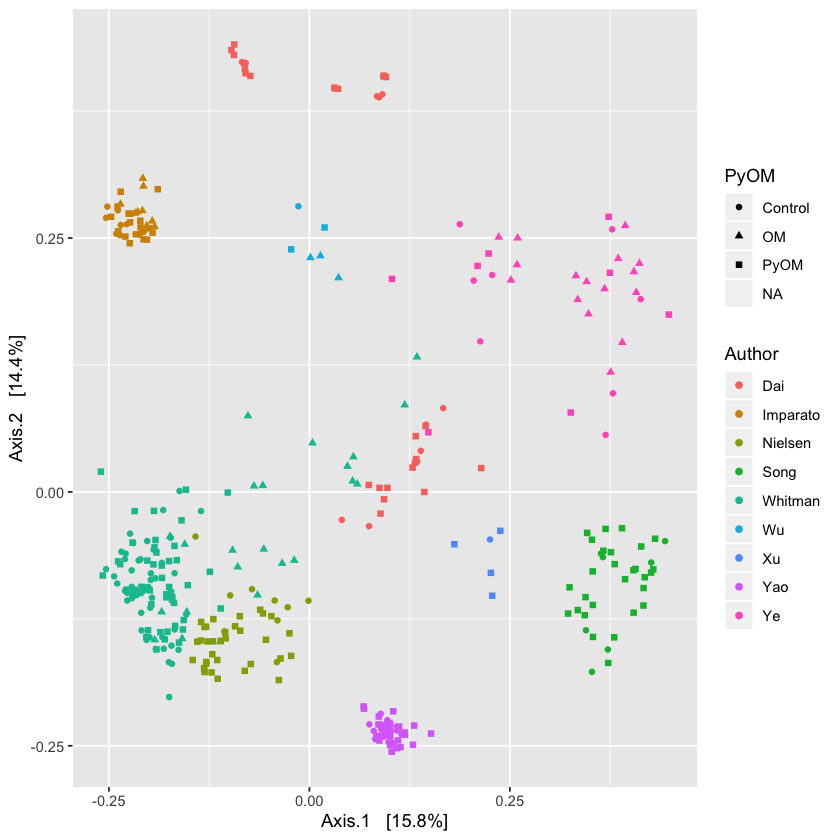

In [81]:
ord = ordinate(ps.glom.genus.norm, method = "PCoA",distance="bray")
p = plot_ordination(ps.glom.genus.norm,ord, color="Author",shape="PyOM")
p

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 9. Consider
specifying shapes manually if you must have them.”


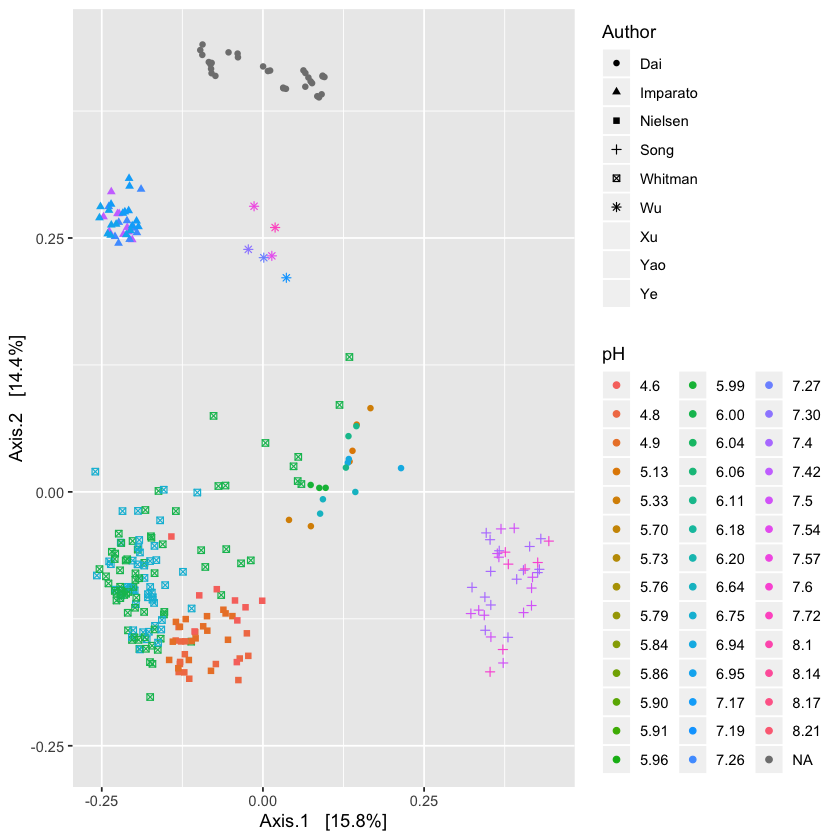

In [82]:
ord = ordinate(ps.glom.genus.norm, method = "PCoA",distance="bray")
p = plot_ordination(ps.glom.genus.norm,ord, color="pH",shape="Author")
p

## Adding Family datasets together

In [84]:
# Checking out the ps objects
yao_pruned.family
whit_pruned.family
imparato_pruned.family
song_pruned.family
dai2016_pruned.family
dai2017_pruned.family
wu_pruned.family
nielsen2014_pruned.family
ye_pruned.family
xu_pruned.family

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 212 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 212 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 222 taxa and 119 samples ]
sample_data() Sample Data:       [ 119 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 222 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 235 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 235 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 231 taxa and 35 samples ]
sample_data() Sample Data:       [ 35 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 231 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 222 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 222 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 148 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 148 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 76 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 76 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 192 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 192 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 207 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 207 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 112 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 112 taxa by 7 taxonomic ranks ]

In [85]:
# Making sure their taxa otu names have been replaced with the genus names
taxa_names(whit_pruned.family) = tax_table(whit_pruned.family)[,"Family"]
taxa_names(yao_pruned.family) = tax_table(yao_pruned.family)[,"Family"]
taxa_names(imparato_pruned.family) = tax_table(imparato_pruned.family)[,"Family"]
taxa_names(song_pruned.family) = tax_table(song_pruned.family)[,"Family"]
taxa_names(dai2016_pruned.family) = tax_table(dai2016_pruned.family)[,"Family"]
taxa_names(dai2017_pruned.family) = tax_table(dai2017_pruned.family)[,"Family"]
taxa_names(wu_pruned.family) = tax_table(wu_pruned.family)[,"Family"]
taxa_names(nielsen2014_pruned.family) = tax_table(nielsen2014_pruned.family)[,"Family"]
taxa_names(ye_pruned.family) = tax_table(ye_pruned.family)[,"Family"]
taxa_names(xu_pruned.family) = tax_table(xu_pruned.family)[,"Family"]

In [86]:
### Getting the taxonomy tables
whit_tax = as(tax_table(whit_pruned.family), "matrix")
whit_tax.df = as.data.frame(whit_tax)

yao_tax = as(tax_table(yao_pruned.family), "matrix")
yao_tax.df = as.data.frame(yao_tax)

imparato_tax = as(tax_table(imparato_pruned.family), "matrix")
imparato_tax.df = as.data.frame(imparato_tax)

song_tax = as(tax_table(song_pruned.family), "matrix")
song_tax.df = as.data.frame(song_tax)

dai2016_tax = as(tax_table(dai2016_pruned.family), "matrix")
dai2016_tax.df = as.data.frame(dai2016_tax)

dai2017_tax = as(tax_table(dai2017_pruned.family), "matrix")
dai2017_tax.df = as.data.frame(dai2017_tax)

wu_tax = as(tax_table(wu_pruned.family), "matrix")
wu_tax.df = as.data.frame(wu_tax)

nielsen2014_tax = as(tax_table(nielsen2014_pruned.family), "matrix")
nielsen2014_tax.df = as.data.frame(nielsen2014_tax)

ye_tax = as(tax_table(ye_pruned.family), "matrix")
ye_tax.df = as.data.frame(ye_tax)

xu_tax = as(tax_table(xu_pruned.family), "matrix")
xu_tax.df = as.data.frame(xu_tax)

In [87]:
### Getting the OTU tables
whit_otu = as(otu_table(whit_pruned.family), "matrix")
whit_otu.df = as.data.frame(t(whit_otu))

yao_otu = as(otu_table(yao_pruned.family), "matrix")
yao_otu.df = as.data.frame(yao_otu)

imparato_otu = as(otu_table(imparato_pruned.family), "matrix")
imparato_otu.df = as.data.frame(imparato_otu)

song_otu = as(otu_table(song_pruned.family), "matrix")
song_otu.df = as.data.frame(song_otu)

dai2016_otu = as(otu_table(dai2016_pruned.family), "matrix")
dai2016_otu.df = as.data.frame(dai2016_otu)

dai2017_otu = as(otu_table(dai2017_pruned.family), "matrix")
dai2017_otu.df = as.data.frame(dai2017_otu)

wu_otu = as(otu_table(wu_pruned.family), "matrix")
wu_otu.df = as.data.frame(wu_otu)

nielsen2014_otu = as(otu_table(nielsen2014_pruned.family), "matrix")
nielsen2014_otu.df = as.data.frame(nielsen2014_otu)

ye_otu = as(otu_table(ye_pruned.family), "matrix")
ye_otu.df = as.data.frame(ye_otu)

xu_otu = as(otu_table(xu_pruned.family), "matrix")
xu_otu.df = as.data.frame(xu_otu)

In [88]:
### Getting the sample data tables
whit_sd = as(sample_data(whit_pruned.family), "matrix")
whit_sd.df = as.data.frame(whit_sd)

yao_sd = as(sample_data(yao_pruned.family), "matrix")
yao_sd.df = as.data.frame(yao_sd)

imparato_sd = as(sample_data(imparato_pruned.family), "matrix")
imparato_sd.df = as.data.frame(imparato_sd)

song_sd = as(sample_data(song_pruned.family), "matrix")
song_sd.df = as.data.frame(song_sd)

dai2016_sd = as(sample_data(dai2016_pruned.family), "matrix")
dai2016_sd.df = as.data.frame(dai2016_sd)

dai2017_sd = as(sample_data(dai2017_pruned.family), "matrix")
dai2017_sd.df = as.data.frame(dai2017_sd)

wu_sd = as(sample_data(wu_pruned.family), "matrix")
wu_sd.df = as.data.frame(wu_sd)

nielsen2014_sd = as(sample_data(nielsen2014_pruned.family), "matrix")
nielsen2014_sd.df = as.data.frame(nielsen2014_sd)

ye_sd = as(sample_data(ye_pruned.family), "matrix")
ye_sd.df = as.data.frame(ye_sd)

xu_sd = as(sample_data(xu_pruned.family), "matrix")
xu_sd.df = as.data.frame(xu_sd)

In [89]:
# Adding a column with Family in it, whcih we will merge by.
whit_otu.df$Family = row.names(whit_otu.df)
yao_otu.df$Family = row.names(yao_otu.df)
imparato_otu.df$Family = row.names(imparato_otu.df)
song_otu.df$Family = row.names(song_otu.df)
dai2016_otu.df$Family = row.names(dai2016_otu.df)
dai2017_otu.df$Family = row.names(dai2017_otu.df)
wu_otu.df$Family = row.names(wu_otu.df)
nielsen2014_otu.df$Family = row.names(nielsen2014_otu.df)
ye_otu.df$Family = row.names(ye_otu.df)
xu_otu.df$Family = row.names(xu_otu.df)

In [90]:
# Merging the two taxonomy files

merged_tax = merge(whit_tax.df, yao_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Family
dim(merged_tax)

merged_tax = merge(merged_tax, imparato_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Family

dim(merged_tax)

merged_tax = merge(merged_tax, song_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Family

dim(merged_tax)

merged_tax = merge(merged_tax, dai2016_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Family

dim(merged_tax)

merged_tax = merge(merged_tax, dai2017_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Family

dim(merged_tax)

merged_tax = merge(merged_tax, wu_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Family

dim(merged_tax)

merged_tax = merge(merged_tax, nielsen2014_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Family

dim(merged_tax)

merged_tax = merge(merged_tax, ye_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Family

dim(merged_tax)

merged_tax = merge(merged_tax, xu_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Family

dim(merged_tax)

[1] 258   7

[1] 296   7

[1] 327   7

[1] 357   7

[1] 378   7

[1] 380   7

[1] 395   7

[1] 409   7

[1] 416   7

In [91]:
# Merging the two otu files, replacing any empty spots with 0
merged_otu = full_join(whit_otu.df, yao_otu.df, by="Family")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Family

dim(merged_otu)

merged_otu = full_join(merged_otu, imparato_otu.df, by="Family")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Family

dim(merged_otu)

merged_otu = full_join(merged_otu, song_otu.df, by="Family")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Family

dim(merged_otu)

merged_otu = full_join(merged_otu, dai2016_otu.df, by="Family")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Family

dim(merged_otu)

merged_otu = full_join(merged_otu, dai2017_otu.df, by="Family")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Family

dim(merged_otu)

merged_otu = full_join(merged_otu, wu_otu.df, by="Family")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Family

dim(merged_otu)

merged_otu = full_join(merged_otu, nielsen2014_otu.df, by="Family")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Family

dim(merged_otu)

merged_otu = full_join(merged_otu, ye_otu.df, by="Family")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Family

dim(merged_otu)

merged_otu = full_join(merged_otu, xu_otu.df, by="Family")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Family

dim(merged_otu)


# Reformatting the otu object
merged_otu = as.matrix(merged_otu,dimnames=list(row.names(merged_otu),colnames(merged_otu)))
storage.mode(merged_otu) = "numeric"

[1] 258 168

[1] 296 204

[1] 327 239

[1] 357 257

[1] 378 287

[1] 380 293

[1] 395 335

[1] 409 367

[1] 416 372

Warning message in storage.mode(merged_otu) = "numeric":
“NAs introduced by coercion”


In [92]:
merged_sd = full_join(name_rows(whit_sd.df), name_rows(yao_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(imparato_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(song_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(dai2016_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(dai2017_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(wu_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(nielsen2014_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(ye_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(xu_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames")

Warning message:
“Column `ForwardPrimerName` has different attributes on LHS and RHS of join”
Warning message:
“Column `SoilType` joining factors with different levels, coercing to character vector”
Warning message:
“Column `NucleicAcidExtraction` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feedstock` joining factors with different levels, coercing to character vector”
Warning message:
“Column `GeographicalLocation` joining factors with different levels, coercing to character vector”


[1] 167  40

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA")

Warning message:
“Column `ForwardPrimerName` joining factors with different levels, coercing to character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `GeographicalLocation` joining character

[1] 203  43

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "NCBISampleID", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "%SOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Geographica

[1] 238  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "g.per.kg.PyOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `GeographicalLocati

[1] 256  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "g.per.kg.PyOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `GeographicalLocati

[1] 286  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "%C")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Geographical

[1] 292  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "TotalC", "TotalN", "%SOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:

[1] 334  51

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "NCBISampleID", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "TotalC", "TotalN", "%SOM", "EC", "Ammonium", "Nitrate")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coe

[1] 366  55

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "NCBISampleID", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "TotalC", "TotalN", "%SOM", "EC", "Ammonium", "Nitrate", "Avail_K", "Org_C", "Avail_P", "TSN")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining chara

[1] 371  55

In [93]:
# Creating the sample data object
merged_sd = sample_data(merged_sd)

# Creating the taxonomy table object
m = tax_table(merged_tax)

# Making sure the rownames and column names transfer, and renaming the final object
row.names(m) = row.names(merged_tax)
colnames(m) = colnames(merged_tax)
merged_tax=m

# Making the otu table object and getting rid of the previous Genus sorting column
merged_otu=otu_table(merged_otu, taxa_are_rows=TRUE)
merged_otu = merged_otu[,!colnames(merged_otu)=="Family"]

Warning message in .local(object):
“Coercing from data.frame class to character matrix 
prior to building taxonomyTable. 
This could introduce artifacts. 
Check your taxonomyTable, or coerce to matrix manually.”


In [94]:
ps.glom.family = phyloseq(merged_sd,merged_tax,merged_otu)
ps.glom.family

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 416 taxa and 371 samples ]
sample_data() Sample Data:       [ 371 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 416 taxa by 7 taxonomic ranks ]

In [95]:
ps.glom.family = prune_samples(sample_names(ps.glom.family)!="SRR4449152-X", ps.glom.family)
ps.glom.family
# Getting rid of no-OTU sample

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 416 taxa and 370 samples ]
sample_data() Sample Data:       [ 370 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 416 taxa by 7 taxonomic ranks ]

In [96]:
#save as an R object
saveRDS(ps.glom.family, "ps.glom.family.ps" )

In [97]:
#normalize
ps.glom.family.norm=transform_sample_counts(ps.glom.family, function(x) x/sum(x))

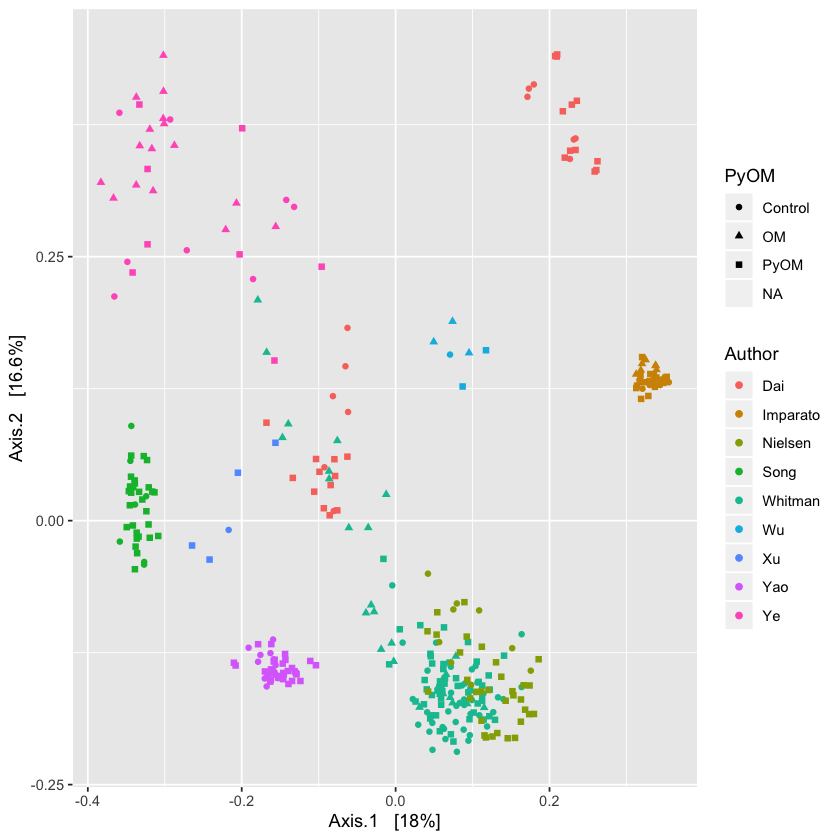

In [98]:
ord = ordinate(ps.glom.family.norm, method = "PCoA",distance="bray")
p = plot_ordination(ps.glom.family.norm,ord, color="Author",shape="PyOM")
p

## Adding Order datasets together

In [99]:
# Checking out the ps objects
yao_pruned.order
whit_pruned.order
imparato_pruned.order
song_pruned.order
dai2016_pruned.order
dai2017_pruned.order
wu_pruned.order
nielsen2014_pruned.order
ye_pruned.order
xu_pruned.order

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 147 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 147 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 153 taxa and 119 samples ]
sample_data() Sample Data:       [ 119 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 153 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 171 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 171 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 191 taxa and 35 samples ]
sample_data() Sample Data:       [ 35 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 191 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 168 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 168 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 104 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 104 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 62 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 62 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 156 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 156 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 147 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 147 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 110 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 110 taxa by 7 taxonomic ranks ]

In [100]:
# Making sure their taxa otu names have been replaced with the order names
taxa_names(whit_pruned.order) = tax_table(whit_pruned.order)[,"Order"]
taxa_names(yao_pruned.order) = tax_table(yao_pruned.order)[,"Order"]
taxa_names(imparato_pruned.order) = tax_table(imparato_pruned.order)[,"Order"]
taxa_names(song_pruned.order) = tax_table(song_pruned.order)[,"Order"]
taxa_names(dai2016_pruned.order) = tax_table(dai2016_pruned.order)[,"Order"]
taxa_names(dai2017_pruned.order) = tax_table(dai2017_pruned.order)[,"Order"]
taxa_names(wu_pruned.order) = tax_table(wu_pruned.order)[,"Order"]
taxa_names(nielsen2014_pruned.order) = tax_table(nielsen2014_pruned.order)[,"Order"]
taxa_names(ye_pruned.order) = tax_table(ye_pruned.order)[,"Order"]
taxa_names(xu_pruned.order) = tax_table(xu_pruned.order)[,"Order"]

In [101]:
### Getting the taxonomy tables
whit_tax = as(tax_table(whit_pruned.order), "matrix")
whit_tax.df = as.data.frame(whit_tax)

yao_tax = as(tax_table(yao_pruned.order), "matrix")
yao_tax.df = as.data.frame(yao_tax)

imparato_tax = as(tax_table(imparato_pruned.order), "matrix")
imparato_tax.df = as.data.frame(imparato_tax)

song_tax = as(tax_table(song_pruned.order), "matrix")
song_tax.df = as.data.frame(song_tax)

dai2016_tax = as(tax_table(dai2016_pruned.order), "matrix")
dai2016_tax.df = as.data.frame(dai2016_tax)

dai2017_tax = as(tax_table(dai2017_pruned.order), "matrix")
dai2017_tax.df = as.data.frame(dai2017_tax)

wu_tax = as(tax_table(wu_pruned.order), "matrix")
wu_tax.df = as.data.frame(wu_tax)

nielsen2014_tax = as(tax_table(nielsen2014_pruned.order), "matrix")
nielsen2014_tax.df = as.data.frame(nielsen2014_tax)

ye_tax = as(tax_table(ye_pruned.order), "matrix")
ye_tax.df = as.data.frame(ye_tax)

xu_tax = as(tax_table(xu_pruned.order), "matrix")
xu_tax.df = as.data.frame(xu_tax)

In [102]:
### Getting the OTU tables
whit_otu = as(otu_table(whit_pruned.order), "matrix")
whit_otu.df = as.data.frame(t(whit_otu))

yao_otu = as(otu_table(yao_pruned.order), "matrix")
yao_otu.df = as.data.frame(yao_otu)

imparato_otu = as(otu_table(imparato_pruned.order), "matrix")
imparato_otu.df = as.data.frame(imparato_otu)

song_otu = as(otu_table(song_pruned.order), "matrix")
song_otu.df = as.data.frame(song_otu)

dai2016_otu = as(otu_table(dai2016_pruned.order), "matrix")
dai2016_otu.df = as.data.frame(dai2016_otu)

dai2017_otu = as(otu_table(dai2017_pruned.order), "matrix")
dai2017_otu.df = as.data.frame(dai2017_otu)

wu_otu = as(otu_table(wu_pruned.order), "matrix")
wu_otu.df = as.data.frame(wu_otu)

nielsen2014_otu = as(otu_table(nielsen2014_pruned.order), "matrix")
nielsen2014_otu.df = as.data.frame(nielsen2014_otu)

ye_otu = as(otu_table(ye_pruned.order), "matrix")
ye_otu.df = as.data.frame(ye_otu)

xu_otu = as(otu_table(xu_pruned.order), "matrix")
xu_otu.df = as.data.frame(xu_otu)

In [103]:
### Getting the sample data tables
whit_sd = as(sample_data(whit_pruned.order), "matrix")
whit_sd.df = as.data.frame(whit_sd)

yao_sd = as(sample_data(yao_pruned.order), "matrix")
yao_sd.df = as.data.frame(yao_sd)

imparato_sd = as(sample_data(imparato_pruned.order), "matrix")
imparato_sd.df = as.data.frame(imparato_sd)

song_sd = as(sample_data(song_pruned.order), "matrix")
song_sd.df = as.data.frame(song_sd)

dai2016_sd = as(sample_data(dai2016_pruned.order), "matrix")
dai2016_sd.df = as.data.frame(dai2016_sd)

dai2017_sd = as(sample_data(dai2017_pruned.order), "matrix")
dai2017_sd.df = as.data.frame(dai2017_sd)

wu_sd = as(sample_data(wu_pruned.order), "matrix")
wu_sd.df = as.data.frame(wu_sd)

nielsen2014_sd = as(sample_data(nielsen2014_pruned.order), "matrix")
nielsen2014_sd.df = as.data.frame(nielsen2014_sd)

ye_sd = as(sample_data(ye_pruned.order), "matrix")
ye_sd.df = as.data.frame(ye_sd)

xu_sd = as(sample_data(xu_pruned.order), "matrix")
xu_sd.df = as.data.frame(xu_sd)

In [104]:
# Adding a column with Family in it, whcih we will merge by.
whit_otu.df$Order = row.names(whit_otu.df)
yao_otu.df$Order = row.names(yao_otu.df)
imparato_otu.df$Order = row.names(imparato_otu.df)
song_otu.df$Order = row.names(song_otu.df)
dai2016_otu.df$Order = row.names(dai2016_otu.df)
dai2017_otu.df$Order = row.names(dai2017_otu.df)
wu_otu.df$Order = row.names(wu_otu.df)
nielsen2014_otu.df$Order = row.names(nielsen2014_otu.df)
ye_otu.df$Order = row.names(ye_otu.df)
xu_otu.df$Order = row.names(xu_otu.df)

In [105]:
# Merging the two taxonomy files

merged_tax = merge(whit_tax.df, yao_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Order
dim(merged_tax)

merged_tax = merge(merged_tax, imparato_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Order

dim(merged_tax)

merged_tax = merge(merged_tax, song_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Order

dim(merged_tax)

merged_tax = merge(merged_tax, dai2016_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Order

dim(merged_tax)

merged_tax = merge(merged_tax, dai2017_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Order

dim(merged_tax)

merged_tax = merge(merged_tax, wu_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Order

dim(merged_tax)

merged_tax = merge(merged_tax, nielsen2014_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Order

dim(merged_tax)

merged_tax = merge(merged_tax, ye_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Order

dim(merged_tax)

merged_tax = merge(merged_tax, xu_tax.df, all=TRUE)
row.names(merged_tax)=merged_tax$Order

dim(merged_tax)

[1] 177   7

[1] 210   7

[1] 246   7

[1] 268   7

[1] 276   7

[1] 277   7

[1] 288   7

[1] 294   7

[1] 297   7

In [106]:
# Merging the two otu files, replacing any empty spots with 0
merged_otu = full_join(whit_otu.df, yao_otu.df, by="Order")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Order

dim(merged_otu)

merged_otu = full_join(merged_otu, imparato_otu.df, by="Order")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Order

dim(merged_otu)

merged_otu = full_join(merged_otu, song_otu.df, by="Order")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Order

dim(merged_otu)

merged_otu = full_join(merged_otu, dai2016_otu.df, by="Order")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Order

dim(merged_otu)

merged_otu = full_join(merged_otu, dai2017_otu.df, by="Order")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Order

dim(merged_otu)

merged_otu = full_join(merged_otu, wu_otu.df, by="Order")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Order

dim(merged_otu)

merged_otu = full_join(merged_otu, nielsen2014_otu.df, by="Order")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Order

dim(merged_otu)

merged_otu = full_join(merged_otu, ye_otu.df, by="Order")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Order

dim(merged_otu)

merged_otu = full_join(merged_otu, xu_otu.df, by="Order")
merged_otu[is.na(merged_otu)] = 0
row.names(merged_otu)=merged_otu$Order

dim(merged_otu)


# Reformatting the otu object
merged_otu = as.matrix(merged_otu,dimnames=list(row.names(merged_otu),colnames(merged_otu)))
storage.mode(merged_otu) = "numeric"

[1] 177 168

[1] 210 204

[1] 246 239

[1] 268 257

[1] 276 287

[1] 277 293

[1] 288 335

[1] 294 367

[1] 297 372

Warning message in storage.mode(merged_otu) = "numeric":
“NAs introduced by coercion”


In [107]:
merged_sd = full_join(name_rows(whit_sd.df), name_rows(yao_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(imparato_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(song_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(dai2016_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(dai2017_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(wu_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(nielsen2014_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(ye_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

merged_sd = full_join((merged_sd), name_rows(xu_sd.df))
row.names(merged_sd)=merged_sd$.rownames
dim(merged_sd)

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames")

Warning message:
“Column `ForwardPrimerName` has different attributes on LHS and RHS of join”
Warning message:
“Column `SoilType` joining factors with different levels, coercing to character vector”
Warning message:
“Column `NucleicAcidExtraction` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feedstock` joining factors with different levels, coercing to character vector”
Warning message:
“Column `GeographicalLocation` joining factors with different levels, coercing to character vector”


[1] 167  40

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA")

Warning message:
“Column `ForwardPrimerName` joining factors with different levels, coercing to character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `GeographicalLocation` joining character

[1] 203  43

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "NCBISampleID", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "%SOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Geographica

[1] 238  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "g.per.kg.PyOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `GeographicalLocati

[1] 256  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "g.per.kg.PyOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `GeographicalLocati

[1] 286  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "%C")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Geographical

[1] 292  45

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "TotalC", "TotalN", "%SOM")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coercing into character vector”
Warning message:

[1] 334  51

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "NCBISampleID", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", "PyOM.pH", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "TotalC", "TotalN", "%SOM", "EC", "Ammonium", "Nitrate")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining character vector and factor, coe

[1] 366  55

Joining, by = c("ForwardPrimerName", "SoilType", "NucleicAcidExtraction", "Feedstock", "GeographicalLocation", "ReversePrimerSequence", "pH", "RevPrimerName", "TargetGene", "ForwardPrimerSequence", "Crop", "SequencingMethod", "t.per.ha.PyOM", "Author", "Region", "Organism", "Habitat", "CurrentLandUse", "Silt", "Sand", "NCBISampleID", "PyOM.Temp", "Incubation_Time_Weeks", "Sampling_Depth_cm", "Clay", "Treatment", "CollectionYear", "BioProject", "BioSample", "PyOM", ".rownames", "FwdBarcode", "RevBarcode", "SRA", "TotalC", "TotalN", "%SOM", "EC", "Ammonium", "Nitrate", "Avail_K", "Org_C", "Avail_P", "TSN")

Warning message:
“Column `ForwardPrimerName` joining character vector and factor, coercing into character vector”
Warning message:
“Column `SoilType` joining character vector and factor, coercing into character vector”
Warning message:
“Column `NucleicAcidExtraction` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feedstock` joining chara

[1] 371  55

In [108]:
# Creating the sample data object
merged_sd = sample_data(merged_sd)

# Creating the taxonomy table object
m = tax_table(merged_tax)

# Making sure the rownames and column names transfer, and renaming the final object
row.names(m) = row.names(merged_tax)
colnames(m) = colnames(merged_tax)
merged_tax=m

# Making the otu table object and getting rid of the previous Genus sorting column
merged_otu=otu_table(merged_otu, taxa_are_rows=TRUE)
merged_otu = merged_otu[,!colnames(merged_otu)=="Order"]

Warning message in .local(object):
“Coercing from data.frame class to character matrix 
prior to building taxonomyTable. 
This could introduce artifacts. 
Check your taxonomyTable, or coerce to matrix manually.”


In [109]:
ps.glom.order = phyloseq(merged_sd,merged_tax,merged_otu)
ps.glom.order

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 297 taxa and 371 samples ]
sample_data() Sample Data:       [ 371 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 297 taxa by 7 taxonomic ranks ]

In [110]:
ps.glom.order = prune_samples(sample_names(ps.glom.order)!="SRR4449152-X", ps.glom.order)
ps.glom.order
# Getting rid of no-OTU sample

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 297 taxa and 370 samples ]
sample_data() Sample Data:       [ 370 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 297 taxa by 7 taxonomic ranks ]

In [111]:
#save as an R object
saveRDS(ps.glom.order, "ps.glom.order.ps" )

In [112]:
#normalize
ps.glom.order.norm=transform_sample_counts(ps.glom.order, function(x) x/sum(x))

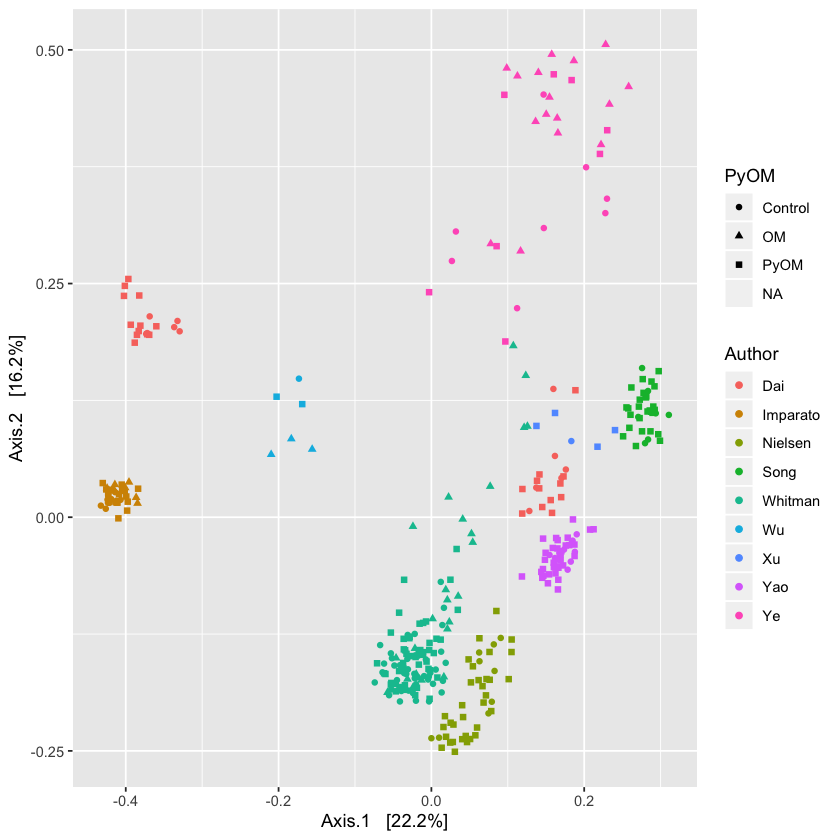

In [113]:
ord = ordinate(ps.glom.order.norm, method = "PCoA",distance="bray")
p = plot_ordination(ps.glom.order.norm,ord, color="Author",shape="PyOM")
p